<a href="https://colab.research.google.com/github/hsuanchia/Image-caption/blob/main/Caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# preprocess


In [ ]:
import json
import pickle
import random
from keras.preprocessing.sequence import pad_sequences
import numpy as np

datasetPath = '/content/drive/MyDrive/new-dataset/'

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open(datasetPath+'output_14x14x512_train5000.pkl', 'rb') as fp:
    outputData = pickle.load(fp)
with open(datasetPath+'/output_14x14x512_5000_val.pkl','rb') as fp:
    valData = pickle.load(fp)


In [ ]:
print(len(outputData))
print(len(valData))
valData = valData[:2500]


5000
5000


In [ ]:
def generateDataset(datas):
    ans = []
    for data in datas:
        for caption in data['captions']:
            ans.append({
                'feature': data['feature'],
                'caption': "<sos> " + caption + " <end>"
            })
    random.shuffle(ans)
    return ans
datas = generateDataset(outputData)
valDatas = generateDataset(valData)
print(datas[0]['feature'].shape)
print(datas[0]['caption'])
print(valDatas[0]['feature'].shape)
print(valDatas[0]['caption'])

(1, 14, 14, 512)
<sos> A clean kitchen has a stainless steel microwave and teapot. <end>
(1, 14, 14, 512)
<sos> Three cows grazing in a field of green grass <end>


In [ ]:
print(len(datas))
print(len(valDatas))

25000
12500


In [ ]:
with open('/content/drive/MyDrive/MSCOCO_2017/2017_annotations/captions_train2017.json') as fp:
    captionData = json.load(fp)
print(captionData['annotations'][0])

captions = []
for data in captionData['annotations']:
    captions.append("<sos> " + data['caption'] + " <end>")
print(captions[0])
print(len(captions))

{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}
<sos> A bicycle replica with a clock as the front wheel. <end>
591753


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<unk>', filters='!"#$%&()*+,-./:;=?@[\]^_`{|}~\t\n',)
tokenizer.fit_on_texts(captions)
tokenizer.fit_on_texts(['<pad>'])


In [ ]:
print(tokenizer.word_index)
# token_dict = {key: word for word, key in tokenizer.word_index.items()}
# print(token_dict)
# print('\n\n')
print(len(tokenizer.word_index))
print(len(tokenizer.word_counts))

wCount = tokenizer.word_counts

word_index = {'<pad>': 0}
index_word = {0: '<pad>'}
# for i, d in wCount.items():
#     print(i, d) i 是文字
for word, key in tokenizer.word_index.items():
    try:
        countNum = wCount[word]
    except:
        if word == '<unk>':
            word_index['<unk>'] = 1
            index_word[1] = '<unk>'
        # print(word, key)
    else:
        if countNum >= 5:
            word_index[word] = key
            index_word[key] = word
        # else:
            # print(word, countNum, key)

print(word_index)
print(index_word)


{'<unk>': 1, 'a': 2, '<sos>': 3, '<end>': 4, 'on': 5, 'of': 6, 'the': 7, 'in': 8, 'with': 9, 'and': 10, 'is': 11, 'man': 12, 'to': 13, 'sitting': 14, 'an': 15, 'two': 16, 'at': 17, 'standing': 18, 'people': 19, 'are': 20, 'next': 21, 'white': 22, 'woman': 23, 'street': 24, 'table': 25, 'holding': 26, 'that': 27, 'large': 28, 'it': 29, 'person': 30, 'some': 31, 'down': 32, 'top': 33, 'group': 34, 'up': 35, 'field': 36, 'small': 37, 'tennis': 38, 'near': 39, 'front': 40, 'his': 41, 'black': 42, 'train': 43, 'plate': 44, 'room': 45, 'dog': 46, 'riding': 47, 'red': 48, 'cat': 49, 'young': 50, 'by': 51, 'water': 52, 'baseball': 53, 'has': 54, 'while': 55, 'playing': 56, 'walking': 57, 'bathroom': 58, 'sign': 59, 'blue': 60, 'kitchen': 61, 'food': 62, 'grass': 63, 'there': 64, 'bus': 65, 'green': 66, 'pizza': 67, 'parked': 68, 'side': 69, 'building': 70, 'other': 71, 'bed': 72, 'looking': 73, 'snow': 74, 'beach': 75, 'ball': 76, 'couple': 77, 'three': 78, 'for': 79, 'boy': 80, 'toilet': 81, 

In [ ]:
def texts_to_sequences(captions):
    captions = captions.lower()
    specials = '!"#$%&()*+,-./:;=?@[\]^_`{|}~\t\n'
    for special in specials:
        captions = captions.replace(special, '')
    words = captions.split(' ')
    tokens = []
    for word in words:
        if word in word_index:
            tokens.append(word_index[word])
        else:
            tokens.append(word_index['<unk>'])
    return tokens

def sequences_to_texts(tokens):

    # print("In function: {}".format(tokens))
    if isinstance(tokens, np.ndarray):
        tokens = tokens.tolist()
    # print('tokens: ', tokens)
    texts = ""
    for token in tokens:
        texts += "{} ".format(index_word[token])
    return texts

for i in range(5):
    print(captions[i])
    caption = captions[i]
    for _ in range(5):
        caption += " <pad>"
    print(caption)
    tokens = texts_to_sequences(caption)
    print(tokens)
    print(sequences_to_texts(tokens))
    print()

<sos> A bicycle replica with a clock as the front wheel. <end>
<sos> A bicycle replica with a clock as the front wheel. <end> <pad> <pad> <pad> <pad> <pad>
[3, 2, 354, 3805, 9, 2, 83, 121, 7, 40, 1082, 4, 0, 0, 0, 0, 0]
<sos> a bicycle replica with a clock as the front wheel <end> <pad> <pad> <pad> <pad> <pad> 

<sos> A room with blue walls and a white sink and door. <end>
<sos> A room with blue walls and a white sink and door. <end> <pad> <pad> <pad> <pad> <pad>
[3, 2, 45, 9, 60, 482, 10, 2, 22, 118, 10, 293, 4, 0, 0, 0, 0, 0]
<sos> a room with blue walls and a white sink and door <end> <pad> <pad> <pad> <pad> <pad> 

<sos> A car that seems to be parked illegally behind a legally parked car <end>
<sos> A car that seems to be parked illegally behind a legally parked car <end> <pad> <pad> <pad> <pad> <pad>
[3, 2, 132, 27, 1460, 13, 334, 68, 8763, 143, 2, 1, 68, 132, 4, 0, 0, 0, 0, 0]
<sos> a car that seems to be parked illegally behind a <unk> parked car <end> <pad> <pad> <pad> <pad> <p

In [ ]:
# print(datas[0])
train_data = [{
    'feature': data['feature'],
    'caption': np.array(pad_sequences(
        [texts_to_sequences(data['caption'])],
        maxlen=30+1,
        padding='post',
        value=word_index['<pad>']
    )[0])
} for data in datas]

val_data = [{
    'feature': data['feature'],
    'caption': np.array(pad_sequences(
        [texts_to_sequences(data['caption'])],
        maxlen=30+1,
        padding='post',
        value=word_index['<pad>']
    )[0])
} for data in valDatas]

In [ ]:
print(train_data[0]['caption'].shape)
print(train_data[0]['caption'])
print(len(train_data[0]['caption']))
print(sequences_to_texts(train_data[0]['caption']))
print(len(train_data))

print(val_data[0]['caption'].shape)
print(val_data[0]['caption'])
print(len(val_data[0]['caption']))
print(sequences_to_texts(val_data[0]['caption']))
print(len(val_data))

(31,)
[   3    2  500   61   54    2  823  662  412   10 3722    4    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0]
31
<sos> a clean kitchen has a stainless steel microwave and teapot <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 
25000
(31,)
[  3  78 244 243   8   2  36   6  66  63   4   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0]
31
<sos> three cows grazing in a field of green grass <end> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> <pad> 
12500


In [ ]:
trainX_caption = np.array([
    data['caption'][:30] for data in train_data 
])
trainX_feature = np.array([
    data['feature'][0] for data in train_data 
])

trainY_caption = np.array([
    data['caption'][1:] for data in train_data 
])

valX_caption = np.array([
    data['caption'][:30] for data in val_data 
])
valX_feature = np.array([
    data['feature'][0] for data in val_data 
])

valY_caption = np.array([
    data['caption'][1:] for data in val_data 
])

valX_caption = valX_caption[11000:]
valX_feature = valX_feature[11000:]
valY_caption = valY_caption[11000:]

In [ ]:
print(trainX_caption[0])
print(trainY_caption[0])

print(valX_caption[0])
print(valY_caption[0])

[   3    2  500   61   54    2  823  662  412   10 3722    4    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[   2  500   61   54    2  823  662  412   10 3722    4    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[  3   2 201  14   5  33   6   2  25   9 196   8  29   4   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
[  2 201  14   5  33   6   2  25   9 196   8  29   4   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]


In [ ]:
print(trainX_caption.shape)
print(trainX_feature.shape)
print(trainY_caption.shape)

print(valX_caption.shape)
print(valX_feature.shape)
print(valY_caption.shape)

# print(trainX_caption[0])
# print(trainY_caption[0])
# print(trainX_feature[0])
# print(tokenizer.sequences_to_texts(train_data[0]['caption']))
# print(datas[0]['caption'])

# print('------')
# print(datas[0]['feature'])

(25000, 30)
(25000, 14, 14, 512)
(25000, 30)
(1500, 30)
(1500, 14, 14, 512)
(1500, 30)


In [ ]:
# with open('/content/drive/MyDrive/MSCOCO_2017/train_set_14x14x512_feature.pkl', 'wb') as fp:
# with open('/content/train_set_14x14x512_feature.pkl', 'wb') as fp:
#     pickle.dump({
#        'word_index': word_index,
#        'index_word': index_word,
#        'trainX_caption': trainX_caption,
#        'trainX_feature': trainX_feature,
#        'trainY_caption': trainY_caption
#     }, fp, protocol=4)

# for i in range(10000, 10250):
#     print('======================')
#     print(trainX_caption[i])
#     print(trainY_caption[i])
#     print('------')


In [ ]:
# ! ls /content -lh
# ! cp /content/train_set_14x14x512_feature.pkl /content/drive/MyDrive/MSCOCO_2017/


In [ ]:
# ! ls /content/drive/MyDrive/MSCOCO_2017/ -lh

In [ ]:
# import pickle
# with open('/content/drive/MyDrive/MSCOCO_2017/train_set_14x14x512_feature.pkl', 'rb') as fp:
#     newData = pickle.load(fp)
# print(newData.keys())


In [ ]:
# print(newData.keys())
# print(newData['word_index'])
# print(newData['index_word'])
# print(newData['trainX_caption'][0])
# print(newData['trainX_feature'][0])
# print(newData['trainY_caption'][0])


In [ ]:
import numpy as np
embeddingData = {}
with open('/content/drive/MyDrive/MSCOCO_2017/GloVe.6B/glove.6B.100d.txt', 'r') as fp:
    embeddingText = fp.read()
    embeddingText = embeddingText.split('\n')
    for wordData in embeddingText:
        tempData = wordData.split(' ')
        embeddingData[tempData[0]] = np.array(tempData[1:])


In [ ]:
print(len(embeddingData))
print(embeddingData['apple'])


400001
['-0.5985' '-0.46321' '0.13001' '-0.019576' '0.4603' '-0.3018' '0.8977'
 '-0.65634' '0.66858' '-0.49164' '0.037557' '-0.050889' '0.6451'
 '-0.53882' '-0.3765' '-0.04312' '0.51384' '0.17783' '0.28596' '0.92063'
 '-0.49349' '-0.48583' '0.61321' '0.78211' '0.19254' '0.91228' '-0.055596'
 '-0.12512' '-0.65688' '0.068557' '0.55629' '1.611' '-0.0073642'
 '-0.48879' '0.45493' '0.96105' '-0.063369' '0.17432' '0.9814' '-1.3125'
 '-0.15801' '-0.54301' '-0.13888' '-0.26146' '-0.3691' '0.26844'
 '-0.24375' '-0.19484' '0.62583' '-0.7377' '0.38351' '-0.75004' '-0.39053'
 '0.091498' '-0.36591' '-1.4715' '-0.45228' '0.2256' '1.1412' '-0.38526'
 '-0.06716' '0.57288' '-0.39191' '0.31302' '-0.29235' '-0.96157' '0.15154'
 '-0.21659' '0.25103' '0.096967' '0.2843' '1.4296' '-0.50565' '-0.51374'
 '-0.47218' '0.32036' '0.023149' '0.22623' '-0.09725' '0.82126' '0.92599'
 '-1.0086' '-0.38639' '0.86408' '-1.206' '-0.28528' '0.2265' '-0.38773'
 '0.40879' '0.59303' '0.30769' '0.83804' '-0.63655' '-0.44639' 

In [ ]:
wordVectors = np.zeros((len(index_word)+1, 100))

for token, word in index_word.items():
    vector = embeddingData.get(word)
    if vector is not None:
        wordVectors[token] = np.array(vector)

wordVectors[index_word.get('<unk>')] = np.random.randn(100)
wordVectors[index_word.get('<sos>')] = np.random.randn(100)
wordVectors[index_word.get('<pad>')] = np.random.randn(100)
wordVectors[index_word.get('<end>')] = np.random.randn(100)

# for i, word in token_dict.items():
#     print(word, wordVectors[i])

# for i in range(1, 10):
#     print(token_dict[i], wordVectors[i])
# print(wordVectors[3335])
print(wordVectors.shape)
print(wordVectors[1])

(10298, 100)
[ 0.80569293  0.51500743  1.72930135  2.00887014 -0.98328939 -1.30477124
  1.1798804   2.32524029  1.84735691 -0.18395002 -0.33736079 -0.57936155
 -0.24181244 -1.82380389 -0.2464589   0.28862477  0.84926114 -0.12141707
  0.07967818  2.02794772 -0.19878799 -0.6358865   0.1888627   1.16770178
  2.85891031  1.07226091 -0.20790554 -0.57743745  0.41386069 -0.57701528
  1.02970947  0.8605853  -0.27773158  2.40310364  0.36081342  0.28026783
 -0.2223071  -0.96804022  1.06908858 -0.24815076 -0.62491146  1.12570854
  1.26557072 -0.27973801 -0.96059531  1.2011407  -2.50243048  0.92774207
 -1.0409069  -1.68642656 -0.39128826 -1.63386887 -0.63712475  0.15252805
 -1.72525843  0.94037699  0.43880209  1.25040919  0.77960636  0.08260094
 -0.93554818 -0.43751953 -0.17903267 -1.65796038 -0.05565858  0.41987426
 -0.60460205 -0.11577266 -0.80140647 -0.40464062  1.25832587 -0.38753093
  0.30657409 -1.32966476 -0.24911329  1.55562914  0.43724667  0.62203933
 -0.01598011  0.51317319  0.23275936  

# MODEL 14 0.5 drop - 0.2
## 2 LSTM - dropout 0.2


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
image_input (InputLayer)        [(None, 14, 14, 512) 0                                            
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 100352)       0           image_input[0][0]                
__________________________________________________________________________________________________
caption_input (InputLayer)      [(None, 30)]         0                                            
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 100352)       0           flatten_1[0][0]                  
______________________________________________________________________________________________

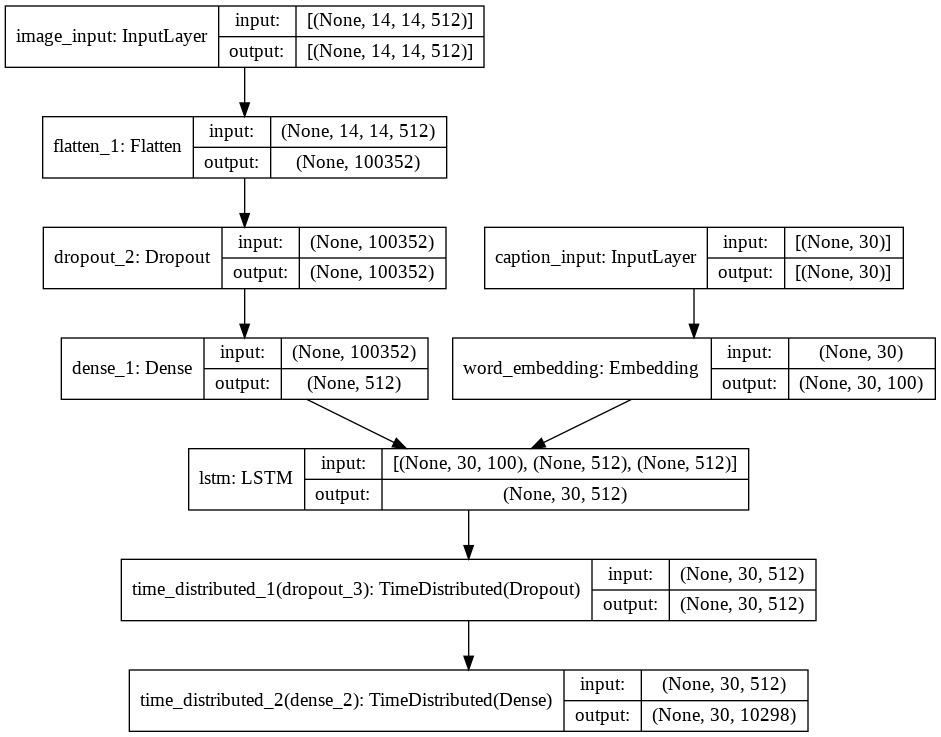

In [ ]:
from keras.layers import Input, Embedding, LSTM, Dense, Flatten, TimeDistributed, Dropout, GRU
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam

# imageInput = Input(shape=(3, 3, 512), name='image_input')
imageInput = Input(shape=(14, 14, 512), name='image_input')
flatten = Flatten()(imageInput)
imageDropout = Dropout(0.5)(flatten)
imageDense = Dense(512)(imageDropout)

captionInput = Input(shape=(30), name='caption_input')
wordEmbeddingLayer = Embedding(len(index_word)+1, 100, mask_zero=False, name='word_embedding')(captionInput)

lstm = LSTM(512, return_sequences=True, return_state=False, name='lstm',
            recurrent_dropout=0.35
    )(wordEmbeddingLayer, initial_state=(imageDense, imageDense))

lstm2 = LSTM(512, return_sequences=True, return_state=False, name='lstm2',
            recurrent_dropout=0.35, dropout=0.3
    )(lstm, initial_state=(imageDense, imageDense))

# gru2 = LSTM(256, return_sequences=True, return_state=False, name='gru2',
#     )(gru, initial_state=(imageDense, ))


dropout = TimeDistributed(Dropout(0.5))(lstm2)
dense = TimeDistributed(Dense(len(word_index)+1, activation='softmax'))(dropout)

model = Model(inputs=[imageInput, captionInput], outputs=dense)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

model.get_layer("word_embedding").set_weights([wordVectors])
model.get_layer("word_embedding").trainable = False
model.summary()

plot_model(model, show_shapes=True, )

In [ ]:
print(trainX_caption.shape)
print(trainY_caption.shape)
print(trainX_feature.shape)

print(valX_caption.shape)
print(valY_caption.shape)
print(valX_feature.shape)

print(trainX_caption[5221])
print(trainY_caption[5221])

print(valX_caption[1499])
print(valY_caption[1499])


(25000, 30)
(25000, 30)
(25000, 14, 14, 512)
(1500, 30)
(1500, 30)
(1500, 14, 14, 512)
[  3   2  12 274  92   2  37 610   8   7  74   5 159   4   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
[  2  12 274  92   2  37 610   8   7  74   5 159   4   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0]
[   3    2   77    6    1   19 2804    2  184   10    2 2471   97    1
    4    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
[   2   77    6    1   19 2804    2  184   10    2 2471   97    1    4
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=2)

model.fit([trainX_feature, trainX_caption], trainY_caption, epochs=100, 
          callbacks=[early_stopping], validation_data=([valX_feature, valX_caption], valY_caption)
          )

Epoch 1/100
782/782 [==============================] - 261s 290ms/step - loss: 2.3531 - sparse_categorical_accuracy: 0.6632 - val_loss: 1.5473 - val_sparse_categorical_accuracy: 0.7345
Epoch 2/100
782/782 [==============================] - 223s 285ms/step - loss: 1.5273 - sparse_categorical_accuracy: 0.7335 - val_loss: 1.4165 - val_sparse_categorical_accuracy: 0.7489
Epoch 3/100
782/782 [==============================] - 223s 285ms/step - loss: 1.4065 - sparse_categorical_accuracy: 0.7437 - val_loss: 1.3621 - val_sparse_categorical_accuracy: 0.7539
Epoch 4/100
782/782 [==============================] - 222s 284ms/step - loss: 1.3259 - sparse_categorical_accuracy: 0.7501 - val_loss: 1.3204 - val_sparse_categorical_accuracy: 0.7592
Epoch 5/100
782/782 [==============================] - 221s 283ms/step - loss: 1.2668 - sparse_categorical_accuracy: 0.7558 - val_loss: 1.2911 - val_sparse_categorical_accuracy: 0.7618
Epoch 6/100
782/782 [==============================] - 220s 281ms/step - lo

In [ ]:
model.save('/content/drive/MyDrive/MSCOCO_2017/snsd0805_h5/final_model3_back2.h5')

# TEST


In [ ]:
import json
import pickle
import random
from keras.preprocessing.sequence import pad_sequences
import numpy as np

datasetPath = '/content/drive/MyDrive/new-dataset/'

In [ ]:
with open('/content/drive/MyDrive/MSCOCO_2017/2017_annotations/captions_train2017.json') as fp:
    captionData = json.load(fp)
print(captionData['annotations'][0])

captions = []
for data in captionData['annotations']:
    captions.append("<sos> " + data['caption'] + " <end>")
print(captions[0])
print(len(captions))

{'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}
<sos> A bicycle replica with a clock as the front wheel. <end>
591753


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<unk>', filters='!"#$%&()*+,-./:;=?@[\]^_`{|}~\t\n',)
tokenizer.fit_on_texts(captions)
tokenizer.fit_on_texts(['<pad>'])


In [ ]:
print(tokenizer.word_index)
# token_dict = {key: word for word, key in tokenizer.word_index.items()}
# print(token_dict)
# print('\n\n')
print(len(tokenizer.word_index))
print(len(tokenizer.word_counts))

wCount = tokenizer.word_counts

word_index = {'<pad>': 0}
index_word = {0: '<pad>'}
# for i, d in wCount.items():
#     print(i, d) i 是文字
for word, key in tokenizer.word_index.items():
    try:
        countNum = wCount[word]
    except:
        if word == '<unk>':
            word_index['<unk>'] = 1
            index_word[1] = '<unk>'
        # print(word, key)
    else:
        if countNum >= 5:
            word_index[word] = key
            index_word[key] = word
        # else:
            # print(word, countNum, key)

print(word_index)
print(index_word)


{'<unk>': 1, 'a': 2, '<sos>': 3, '<end>': 4, 'on': 5, 'of': 6, 'the': 7, 'in': 8, 'with': 9, 'and': 10, 'is': 11, 'man': 12, 'to': 13, 'sitting': 14, 'an': 15, 'two': 16, 'at': 17, 'standing': 18, 'people': 19, 'are': 20, 'next': 21, 'white': 22, 'woman': 23, 'street': 24, 'table': 25, 'holding': 26, 'that': 27, 'large': 28, 'it': 29, 'person': 30, 'some': 31, 'down': 32, 'top': 33, 'group': 34, 'up': 35, 'field': 36, 'small': 37, 'tennis': 38, 'near': 39, 'front': 40, 'his': 41, 'black': 42, 'train': 43, 'plate': 44, 'room': 45, 'dog': 46, 'riding': 47, 'red': 48, 'cat': 49, 'young': 50, 'by': 51, 'water': 52, 'baseball': 53, 'has': 54, 'while': 55, 'playing': 56, 'walking': 57, 'bathroom': 58, 'sign': 59, 'blue': 60, 'kitchen': 61, 'food': 62, 'grass': 63, 'there': 64, 'bus': 65, 'green': 66, 'pizza': 67, 'parked': 68, 'side': 69, 'building': 70, 'other': 71, 'bed': 72, 'looking': 73, 'snow': 74, 'beach': 75, 'ball': 76, 'couple': 77, 'three': 78, 'for': 79, 'boy': 80, 'toilet': 81, 

In [ ]:
def texts_to_sequences(captions):
    captions = captions.lower()
    specials = '!"#$%&()*+,-./:;=?@[\]^_`{|}~\t\n'
    for special in specials:
        captions = captions.replace(special, '')
    words = captions.split(' ')
    tokens = []
    for word in words:
        if word in word_index:
            tokens.append(word_index[word])
        else:
            tokens.append(word_index['<unk>'])
    return tokens

def sequences_to_texts(tokens):

    # print("In function: {}".format(tokens))
    if isinstance(tokens, np.ndarray):
        tokens = tokens.tolist()
    # print('tokens: ', tokens)
    texts = ""
    for token in tokens:
        texts += "{} ".format(index_word[token])
    return texts

for i in range(5):
    print(captions[i])
    caption = captions[i]
    for _ in range(5):
        caption += " <pad>"
    print(caption)
    tokens = texts_to_sequences(caption)
    print(tokens)
    print(sequences_to_texts(tokens))
    print()

<sos> A bicycle replica with a clock as the front wheel. <end>
<sos> A bicycle replica with a clock as the front wheel. <end> <pad> <pad> <pad> <pad> <pad>
[3, 2, 354, 3805, 9, 2, 83, 121, 7, 40, 1082, 4, 0, 0, 0, 0, 0]
<sos> a bicycle replica with a clock as the front wheel <end> <pad> <pad> <pad> <pad> <pad> 

<sos> A room with blue walls and a white sink and door. <end>
<sos> A room with blue walls and a white sink and door. <end> <pad> <pad> <pad> <pad> <pad>
[3, 2, 45, 9, 60, 482, 10, 2, 22, 118, 10, 293, 4, 0, 0, 0, 0, 0]
<sos> a room with blue walls and a white sink and door <end> <pad> <pad> <pad> <pad> <pad> 

<sos> A car that seems to be parked illegally behind a legally parked car <end>
<sos> A car that seems to be parked illegally behind a legally parked car <end> <pad> <pad> <pad> <pad> <pad>
[3, 2, 132, 27, 1460, 13, 334, 68, 8763, 143, 2, 1, 68, 132, 4, 0, 0, 0, 0, 0]
<sos> a car that seems to be parked illegally behind a <unk> parked car <end> <pad> <pad> <pad> <pad> <p

In [ ]:
model_path = "/content/drive/MyDrive/MSCOCO_2017/snsd0805_h5/final_model3_back2.h5"

In [ ]:
from keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import VGG16
from keras.models import Sequential, Model
from keras.layers import MaxPool2D, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import tensorflow as tf
import logging 
import matplotlib.pyplot as plt

tf.get_logger().setLevel(logging.ERROR)

base_model_1 = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model_1 = Model(inputs=base_model_1.input, outputs=base_model_1.layers[-2].output)

model = Sequential()
model.add(base_model_1)

captionModel = load_model(model_path)

def caption(imgName, show):
    if isinstance(imgName, str):
        # model.add(GlobalAveragePooling2D())
        # model.add(MaxPool2D((2,2), strides=2, padding='valid'))
        
        img = image.load_img('{}'.format(imgName), target_size=(224, 224))
        
        plt.imshow(img)
        plt.show()

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        imageInput = model.predict(x)
    else:
        imageInput = imgName
    
    current_token = tokenizer.word_index['<sos>']
    captionInput = np.zeros((1, 30))
    # captionInput[0, 0] = current_token
    current_token_count = 0
    for i in range(30):
        captionInput[0, current_token_count] = current_token
        # print(captionInput)
        pr = captionModel.predict([imageInput, captionInput])
        # print(np.argmax(pr[0, current_token_count]), token_dict[np.argmax(pr[0, current_token_count])])
        current_token = np.argmax(pr[0, current_token_count])
        current_token_count += 1
    output = tokenizer.sequences_to_texts(captionInput)[0].split(' ')

    ans = ""
    for word in output:
        if word!="<sos>":
            if word=="<end>":
                break
            if show:
                print(word, end=' ')
            ans += " " + word
    if show:
        print('\n\n\n')
    else:
        return ans



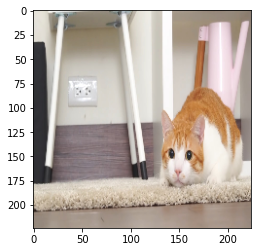

 a cat sitting on a bed with a cat on it


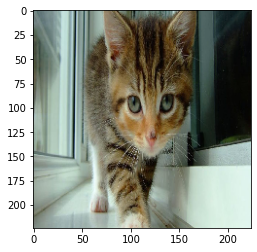

a cat is sitting on a bed with a cat 





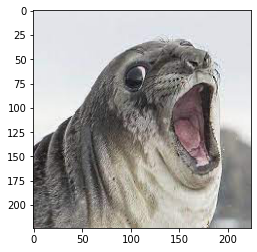

a cat is sitting on a rock in a forest 





In [ ]:
basePath = '/content/drive/MyDrive/'
cap = caption(basePath+'eggroll.jpg', False)
print(cap)
caption(basePath+'cat2.jpg', True)
caption(basePath+'seal.jpg', True)


# Run All

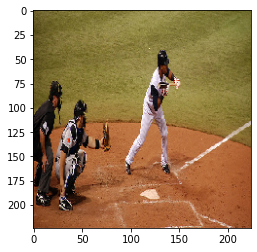

a baseball player is getting ready to hit the ball 





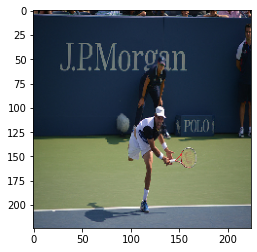

a tennis player is swinging a racket at a ball 





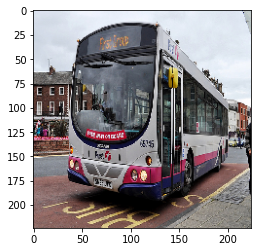

a bus driving down a street with a bus 





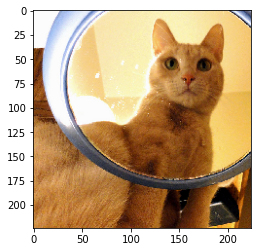

a cat sitting on a chair with a dog on it 





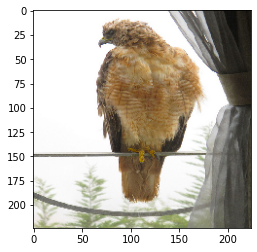

a dog is standing in a field with a bird 





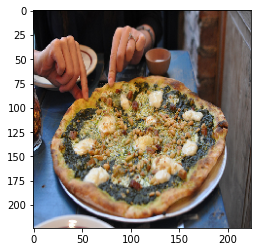

a pizza with a pizza and a fork 





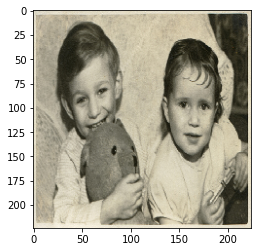

a woman holding a cell phone in his mouth 





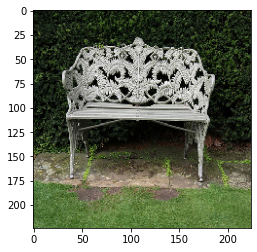

a large stone bench in a field 





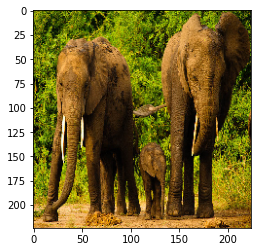

a group of elephants standing in a field 





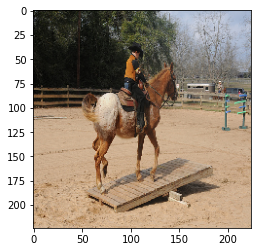

a dog is sitting on a bench with a frisbee 





In [ ]:
valPath = '/content/drive/MyDrive/MSCOCO_2017/val2017/'

caption(valPath+"000000485480.jpg", True)
caption(valPath+"000000000885.jpg", True)
caption(valPath+"000000005037.jpg", True)
caption(valPath+"000000063552.jpg", True)
caption(valPath+"000000270705.jpg", True)

caption(valPath+"000000307172.jpg", True)
caption(valPath+"000000321333.jpg", True)
caption(valPath+"000000322829.jpg", True)
caption(valPath+"000000346905.jpg", True)
caption(valPath+"000000454798.jpg", True)


In [ ]:
caption(valPath+"000000000285.jpg")
caption(valPath+"000000005477.jpg")
caption(valPath+"000000020992.jpg")
caption(valPath+"000000060090.jpg")
caption(valPath+"000000026926.jpg")

caption(valPath+"000000057027.jpg")
caption(valPath+"000000057027.jpg")
caption(valPath+"000000128051.jpg")
caption(valPath+"000000122969.jpg")
caption(valPath+"000000168458.jpg")


TypeError: ignored

In [ ]:
caption(valPath+"000000227044.jpg")
caption(valPath+"000000235064.jpg")
caption(valPath+"000000275392.jpg")
caption(valPath+"000000282037.jpg")
caption(valPath+"000000099053.jpg")

caption(valPath+"000000308545.jpg")
caption(valPath+"000000311928.jpg")
caption(valPath+"000000319184.jpg")
caption(valPath+"000000335177.jpg")
caption(valPath+"000000334977.jpg")


In [ ]:
testPath = '/content/drive/MyDrive/MSCOCO_2017/some_train_picture/'

caption(testPath+"000000000016.jpg")
caption(testPath+"000000001653.jpg")
caption(testPath+"000000003805.jpg")
caption(testPath+"000000003946.jpg")
caption(testPath+"000000002981.jpg")

caption(testPath+"000000007426.jpg")
caption(testPath+"000000007881.jpg")
caption(testPath+"000000009580.jpg")
caption(testPath+"000000015348.jpg")
caption(testPath+"000000019910.jpg")


In [ ]:
caption(testPath+"000000004878.jpg")
caption(testPath+"000000007454.jpg")
caption(testPath+"000000011692.jpg")
caption(testPath+"000000018286.jpg")
caption(testPath+"000000020430.jpg")


# BLEU

In [ ]:

p = open('/content/drive/MyDrive/MSCOCO_2017/new-dataset/output_14x14x512_5000_val.pkl','rb')
val_data = pickle.load(p)

def get_imgid(file_name):
    id = ""
    f = 0
    for i in range(12):
        if file_name[i] != "0":
            f = 1
        if f == 1: 
            id += file_name[i]
    return int(id)



In [ ]:
caption(val_data[0]['feature'], True)

a plate of food with a fork and a fork 





In [ ]:
print(val_data[0]['captions'])

['A white bowl filled with meat, vegetables and broth.', 'A person holding a plate with food ', 'A bowl of stew in a white bowl, being held by a person.', 'A bowl of a kind of vegetable stew on a table.', 'A bowl has a soup with potatoes and vegetables. ']


In [ ]:
get_imgid('000000700765.jpg')

700765

In [ ]:
from tqdm import tqdm
# 產生所有 val 的 caption 預測結果並輸出成規定格式
# 評分資料格式在 https://cocodataset.org/#format-data 的 5. Image Captioning 大標下有規定
results = list()
counter = 0
for data in tqdm(val_data[:2500]):  # 多加個 tqdm 是為了看他印出漂亮的進度條
    one_result = dict()
    # caption(basePath+'seal.jpg', True)
    cap = caption(data['feature'], show=False) # 把這裡替換成你用來生 caption 的 function
    one_result["image_id"] = get_imgid(data['filename'])
    one_result["caption"] = cap
    results.append(one_result)
    counter += 1


100%|██████████| 2500/2500 [1:27:53<00:00,  2.11s/it]


In [ ]:
import json
# 輸出成 json 檔
generated_caption_path = "generated_caption_val2017.json"
with open(generated_caption_path, 'w') as jsonfile:
    json.dump(results, jsonfile)

In [ ]:
def evaluate_coco(generated_json, answer_json):
    import os, sys
    if not os.path.exists('coco-caption'):
        # 下載相容 Python3 的非官方套件
        !git clone https://github.com/davidfsemedo/coco-caption
    sys.path.insert(0,"/content/coco-caption")
    from pycocotools.coco import COCO
    from pycocoevalcap.eval import COCOEvalCap
    import skimage.io as io
    import pylab
    pylab.rcParams['figure.figsize'] = (10.0, 8.0)

    from json import encoder
    encoder.FLOAT_REPR = lambda o: format(o, '.3f')

    # 繞過 val2017 和 2014 格式不同的 bug 
    # https://github.com/tylin/coco-caption/issues/26#issuecomment-439825144
    if (os.path.basename(answer_json) == "captions_val2017.json"):
        modified_anno_path = "/content/modified_captions_val2017.json"
        with open(answer_json, 'r') as f:
            data = json.load(f)
        data['type'] = 'captions'
        with open(modified_anno_path, 'w') as f:
            json.dump(data, f)
        answer_anno_path = modified_anno_path
    else:
        answer_anno_path = answer_json

    coco = COCO(answer_anno_path)
    cocoRes = coco.loadRes(generated_json)

    # create cocoEval object by taking coco and cocoRes
    cocoEval = COCOEvalCap(coco, cocoRes)

    # evaluate on a subset of images by setting
    # cocoEval.params['image_id'] = cocoRes.getImgIds()
    # please remove this line when evaluating the full validation set
    cocoEval.params['image_id'] = cocoRes.getImgIds()

    # evaluate results
    cocoEval.evaluate()

    # print output evaluation scores
    for metric, score in cocoEval.eval.items():
        print('%s: %.3f'%(metric, score))

In [ ]:
generated_json_path = "generated_caption_val2017.json"
answer_json_path = "/content/drive/MyDrive/MSCOCO_2017/2017_annotations/captions_val2017.json"
evaluate_coco(generated_caption_path, answer_json_path)

Cloning into 'coco-caption'...
remote: Enumerating objects: 737, done.
remote: Total 737 (delta 0), reused 0 (delta 0), pack-reused 737
Receiving objects: 100% (737/737), 106.72 MiB | 39.04 MiB/s, done.
Resolving deltas: 100% (400/400), done.
loading annotations into memory...
0:00:00.040536
creating index...
index created!
Loading and preparing results...     
DONE (t=0.01s)
creating index...
index created!
tokenization...
setting up scorers...
computing Bleu score...
{'testlen': 24040, 'reflen': 23870, 'guess': [24040, 21540, 19040, 16540], 'correct': [14150, 5795, 2094, 760]}
ratio: 1.0071219103476745
Bleu_1: 0.589
Bleu_2: 0.398
Bleu_3: 0.259
Bleu_4: 0.168
computing METEOR score...
METEOR: 0.174
computing Rouge score...
ROUGE_L: 0.431
computing CIDEr score...
CIDEr: 0.476
Bleu_1: 0.589
Bleu_2: 0.398
Bleu_3: 0.259
Bleu_4: 0.168
METEOR: 0.174
ROUGE_L: 0.431
CIDEr: 0.476
